In [1]:
# import netCDF4
import numpy as np
import pandas
import glob
from copy import deepcopy
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import BoundaryNorm

from scipy.stats import *
from sklearn import linear_model
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

from get_LWPCMIP5data import *
from get_LWPCMIP6data import *
from get_OBSLRMdata import *
from useful_func_cy import *
from fitLRM_cy1 import *
from fitLRM_cy2 import *

from fitLRMobs import *
from useful_func_cy import *
from calc_Radiation_LRM_1 import *
from calc_Radiation_LRM_2 import *

from area_mean import *
from binned_cyFunctions5 import *
from useful_func_cy import *

import cartopy.crs as ccrs   #..projection method
import cartopy.feature as cfeat
import matplotlib.ticker as mticker
from matplotlib import cm
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# OBServational constraint on the radiation and LWP:
from calc_LRMobs_metric import *
from calc_Radiation_OBS_2 import *
from Aploting_Sep11 import *

In [2]:
# Calculate 5*5 bin array for variables (LWP, CCFs) in Sounthern Ocean Region:
#..set are-mean range and define function
s_range = arange(-90., 90., 5.) + 2.5  #..global-region latitude edge: (36)
x_range = arange(-180., 180., 5.)  #..logitude sequences edge: number: 72
y_range = arange(-85, -40., 5.) + 2.5  #..southern-ocaen latitude edge: 9

path1 = '/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/'
path6 = '/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/plot_file/plots_Oct24_revise_add_YSSAR/'

valid_range1=[2003, 1, 15]
valid_range2=[2016, 12, 31]

In [3]:
# GCMs lists:

exp = 'piControl'

# CMIP6: 31 (30: BCCCSMCM2MR)
AWICM11MR = {'modn': 'AWI-CM-1-1-MR', 'consort': 'AWI', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
BCCCSMCM2MR = {'modn': 'BCC-CSM2-MR', 'consort': 'BCC', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
BCCESM1 = {'modn': 'BCC-ESM1', 'consort': 'BCC', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CAMSCSM1 = {'modn': 'CAMS-CSM1-0', 'consort': 'CAMS', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CMCCCM2SR5 = {'modn': 'CMCC-CM2-SR5', 'consort': 'CMCC', 'cmip': 'cmip6', 
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2 = {'modn': 'CESM2', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2FV2 = {'modn': 'CESM2-FV2', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2WACCM = {'modn': 'CESM2-WACCM', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2WACCMFV2 = {'modn': 'CESM2-WACCM-FV2', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}

CNRMCM61 = {'modn': 'CNRM-CM6-1', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6', 
               'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
CNRMCM61HR = {'modn': 'CNRM-CM6-1-HR', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
CNRMESM21 = {'modn': 'CNRM-ESM2-1', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6', 
                 'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
CanESM5 = {'modn': 'CanESM5', 'consort': 'CCCma', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
E3SM10 = {'modn': 'E3SM-1-0', 'consort': 'E3SM-Project', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}

ECEarth3 = {'modn': 'EC-Earth3', 'consort': 'EC-Earth-Consortium', 'cmip': 'cmip6',
       'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}
ECEarth3Veg = {'modn': 'EC-Earth3-Veg', 'consort': 'EC-Earth-Consortium', 'cmip': 'cmip6',
       'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}

FGOALSg3 = {'modn': 'FGOALS-g3', 'consort': 'CAS', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GISSE21G = {'modn': 'GISS-E2-1-G', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GISSE21H = {'modn': 'GISS-E2-1-H', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GISSE22G = {'modn': 'GISS-E2-2-G', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GFDLCM4 = {'modn': 'GFDL-CM4', 'consort': 'NOAA-GFDL', 'cmip': 'cmip6',
           'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr1', "typevar": 'Amon'}
# HADGEM3 = {'modn': 'HadGEM3-GC31-LL', 'consort': 'MOHC', 'cmip': 'cmip6',
#             'exper': 'piControl', 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}   #..missing 'wap' in 'piControl' exp(Daniel says that HadGEM3-GC31 not using p-level, so doesn't have variables on p-level
INM_CM48 = {'modn': 'INM-CM4-8', 'consort': 'INM', 'cmip': 'cmip6', 
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr1', "typevar": 'Amon'}
IPSLCM6ALR = {'modn': 'IPSL-CM6A-LR', 'consort': 'IPSL', 'cmip': 'cmip6',
                  'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}
MIROCES2L = {'modn': 'MIROC-ES2L', 'consort': 'MIROC', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gn', "typevar": 'Amon'}
MIROC6 = {'modn': 'MIROC6', 'consort': 'MIROC', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
MPIESM12LR = {'modn': 'MPI-ESM1-2-LR', 'consort': 'MPI-M', 'cmip': 'cmip6',
                  'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
MRIESM20 = {'modn': 'MRI-ESM2-0', 'consort': 'MRI', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
NESM3 = {'modn': 'NESM3', 'consort': 'NUIST', 'cmip': 'cmip6', 
                 'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
NorESM2MM = {'modn': 'NorESM2-MM', 'consort': 'NCC', 'cmip': 'cmip6',
                 'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
SAM0 = {'modn': 'SAM0-UNICON', 'consort': 'SNU', 'cmip': 'cmip6', 
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
TaiESM1 = {'modn': 'TaiESM1', 'consort': 'AS-RCEC', 'cmip': 'cmip6', 
                 'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}

# CMIP5: 20 (18, ACCESS10, ACCESS13)

ACCESS10 = {'modn': 'ACCESS1-0', 'consort': 'CSIRO-BOM', 'cmip': 'cmip5',   # 2-d (145) and 3-d (146) variables have different lat shape
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
ACCESS13 = {'modn': 'ACCESS1-3', 'consort': 'CSIRO-BOM', 'cmip': 'cmip5',   # 2-d (145) and 3-d (146) variables have different lat shape
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
BNUESM = {'modn': 'BNU-ESM', 'consort': 'BNU', 'cmip': 'cmip5',
          'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}

CCSM4 = {'modn': 'CCSM4', 'consort': 'NCAR', 'cmip': 'cmip5',
             'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
CNRMCM5 = {'modn': 'CNRM-CM5', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
CSIRO_Mk360 = {'modn': 'CSIRO-Mk3-6-0', 'consort': 'CSIRO-QCCCE', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
CanESM2 = {'modn': 'CanESM2', 'consort': 'CCCma', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
FGOALSg2 = {'modn': 'FGOALS-g2', 'consort': 'LASG-CESS', 'cmip': 'cmip5',   # missing 'prw' in piControl
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
FGOALSs2 = {'modn': 'FGOALS-s2', 'consort': 'LASG-IAP', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GFDLCM3 = {'modn': 'GFDL-CM3', 'consort': 'NOAA-GFDL', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GISSE2H = {'modn': 'GISS-E2-H', 'consort': 'NASA-GISS', 'cmip': 'cmip5',
           'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GISSE2R = {'modn': 'GISS-E2-R', 'consort': 'NASA-GISS', 'cmip': 'cmip5',
           'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
IPSLCM5ALR = {'modn': 'IPSL-CM5A-LR', 'consort': 'IPSL', 'cmip': 'cmip5',
               'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MIROC5 = {'modn': 'MIROC5', 'consort': 'MIROC', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MPIESMMR = {'modn': 'MPI-ESM-MR', 'consort': 'MPI-M', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
NorESM1M = {'modn': 'NorESM1-M', 'consort': 'NCC', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}

MIROCESM = {'modn': 'MIROC-ESM', 'consort': 'MIROC', 'cmip': 'cmip5', 
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MRICGCM3 = {'modn': 'MRI-CGCM3', 'consort': 'MRI', 'cmip': 'cmip5', 
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MPIESMLR = {'modn': 'MPI-ESM-LR', 'consort': 'MPI-M', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
bcccsm11 = {'modn': 'bcc-csm1-1', 'consort': 'BCC', 'cmip': 'cmip5', 
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GFDLESM2G = {'modn': 'GFDL-ESM2G', 'consort': 'NOAA-GFDL', 'cmip': 'cmip5', 
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GFDLESM2M = {'modn': 'GFDL-ESM2M', 'consort': 'NOAA-GFDL', 'cmip': 'cmip5', 
           'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
inmcm4 = {'modn': 'inmcm4', 'consort': 'INM', 'cmip': 'cmip5', 
             'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
deck2  = [BCCESM1, CanESM5, CESM2, CESM2FV2, CESM2WACCM, CNRMESM21, GISSE21G, GISSE21H, IPSLCM6ALR, MRIESM20, MIROC6, SAM0, E3SM10, FGOALSg3, GFDLCM4, CAMSCSM1, INM_CM48, MPIESM12LR, AWICM11MR, CMCCCM2SR5, CESM2WACCMFV2, CNRMCM61, CNRMCM61HR, ECEarth3, ECEarth3Veg, GISSE22G, MIROCES2L, NESM3, NorESM2MM, TaiESM1, BNUESM, CCSM4, CNRMCM5, CSIRO_Mk360, CanESM2, FGOALSg2, FGOALSs2, GFDLCM3, GISSE2H, GISSE2R, IPSLCM5ALR, MIROC5, MPIESMMR, NorESM1M, MIROCESM, MRICGCM3, MPIESMLR, bcccsm11, GFDLESM2G, GFDLESM2M]  #..current # 30 + 20

deck_nas2 = ['BCCESM1', 'CanESM5', 'CESM2', 'CESM2FV2', 'CESM2WACCM', 'CNRMESM21', 'GISSE21G', 'GISSE21H', 'IPSLCM6ALR', 'MRIESM20', 'MIROC6', 'SAM0', 'E3SM10', 'FGOALSg3', 'GFDLCM4', 'CAMSCSM1', 'INM_CM48', 'MPIESM12LR', 'AWICM11MR', 'CMCCCM2SR5', 'CESM2WACCMFV2', 'CNRMCM61', 'CNRMCM61HR', 'ECEarth3', 'ECEarth3Veg', 'GISSE22G', 'MIROCES2L', 'NESM3', 'NorESM2MM', 'TaiESM1', 'BNUESM', 'CCSM4', 'CNRMCM5', 'CSIRO_Mk360', 'CanESM2', 'FGOALSg2', 'FGOALSs2', 'GFDLCM3', 'GISSE2H', 'GISSE2R', 'IPSLCM5ALR', 'MIROC5', 'MPIESMMR', 'NorESM1M', 'MIROCESM', 'MRICGCM3', 'MPIESMLR', 'bcccsm11', 'GFDLESM2G', 'GFDLESM2M']  #..current # 30 + 20 ('19': 'BCCCSMCM2MR';)

# $R^{2}\ of\ GCMs\ vs.\ T_{s}$

In [10]:
R2 = {}
Ts_gcm = {}
TR_Ts_gcm = {}
TR_SUB500_gcm = {}
for N_of_model in range(len(deck2)):
    # N_of_model = 2

    WD = '/glade/scratch/chuyan/CMIP_output/'

    folder = glob.glob(WD+ deck_nas2[N_of_model]+'__'+ 'STAT_pi+abr_'+'22x_31y_Sep9th_anomalies'+ '.npz')
    # print(folder)
    output_ARRAY = np.load(folder[0], allow_pickle=True)  # str(TR_sst)
    TR_sst1 = output_ARRAY['TR_minabias_SST']
    TR_sub1 = output_ARRAY['TR_minabias_SUB']
    TR_sst2 = output_ARRAY['TR_maxR2_SST']
    TR_sub2 = output_ARRAY['TR_maxR2_SUB']
    TR_Ts_gcm[deck_nas2[N_of_model]] = TR_sst2
    TR_SUB500_gcm[deck_nas2[N_of_model]] = TR_sub2
    print("GCM: No.", str(N_of_model+1), " :", deck2[N_of_model]['modn'])
    print("TR_min_abs(bias): " , TR_sst1, '  K ', TR_sub1 , ' Pa/s ')
    print("TR_large_pi_R_2: ", TR_sst2, '  K ', TR_sub2 , ' Pa/s ')

    x_gcm = np.asarray(output_ARRAY['bound_x'])
    y_gcm = np.asarray(output_ARRAY['bound_y'])
    stats_5 = output_ARRAY['stats_5']   # R^2
    # print(stats_5.shape)


    # Retrieve the colume of R2 vs. Ts that contains the TR_maxR2_SUB:
    R2_gcm_sst = []
    for j in range(len(x_gcm)):

        if TR_sub2 == x_gcm[j]:

            print("the "+str(j)+"th column.")
            R2_gcm_sst = stats_5[:, j]

    # print(R2_gcm_sst.shape)
    Ts_gcm[deck_nas2[N_of_model]] = y_gcm[:-1]
    
    R2[deck_nas2[N_of_model]] = R2_gcm_sst

GCM: No. 1  : BCC-ESM1
TR_min_abs(bias):  -3.6256886865081412   K  0.005195902652838751  Pa/s 
TR_large_pi_R_2:  -3.6256886865081412   K  0.0017461933030390314  Pa/s 
the 10th column.
GCM: No. 2  : CanESM5
TR_min_abs(bias):  0.0937027035334026   K  0.006289309966738037  Pa/s 
TR_large_pi_R_2:  -12.912223098061652   K  -0.008917174643221778  Pa/s 
the 7th column.
GCM: No. 3  : CESM2
TR_min_abs(bias):  0.2841552826285252   K  0.01707090606822593  Pa/s 
TR_large_pi_R_2:  0.2841552826285252   K  0.01707090606822593  Pa/s 
the 14th column.
GCM: No. 4  : CESM2-FV2
TR_min_abs(bias):  -0.4166473052605397   K  0.015499345528856234  Pa/s 
TR_large_pi_R_2:  -0.4166473052605397   K  0.019034111474352418  Pa/s 
the 15th column.
GCM: No. 5  : CESM2-WACCM
TR_min_abs(bias):  0.34946251864153766   K  0.017033585286237378  Pa/s 
TR_large_pi_R_2:  0.34946251864153766   K  0.017033585286237378  Pa/s 
the 14th column.
GCM: No. 6  : CNRM-ESM2-1
TR_min_abs(bias):  -9.54661159214455   K  0.009657684527272586 

In [5]:
print(Ts_gcm)

{'BCCESM1': array([-64.25574653, -61.49983481, -58.74392309, -55.98801137,
       -53.23209965, -50.47618793, -47.72027621, -44.96436449,
       -42.20845277, -39.45254105, -36.69662933, -33.94071761,
       -31.18480589, -28.42889417, -25.67298245, -22.91707073,
       -20.16115901, -17.40524729, -14.64933557, -11.89342385,
        -9.13751213,  -6.38160041,  -3.62568869,  -0.86977697,
         1.88613475,   4.64204647,   7.39795819,  10.15386991,
        12.90978164,  15.66569336]), 'CanESM5': array([-59.73355598, -57.13237082, -54.53118566, -51.9300005 ,
       -49.32881534, -46.72763018, -44.12644502, -41.52525986,
       -38.9240747 , -36.32288954, -33.72170438, -31.12051922,
       -28.51933406, -25.9181489 , -23.31696374, -20.71577858,
       -18.11459342, -15.51340826, -12.9122231 , -10.31103794,
        -7.70985278,  -5.10866762,  -2.50748246,   0.0937027 ,
         2.69488786,   5.29607302,   7.89725818,  10.49844334,
        13.09962851,  15.70081367]), 'CESM2': array([-58.4

(0.279574, 0.170599, 0.479997, 1.0)


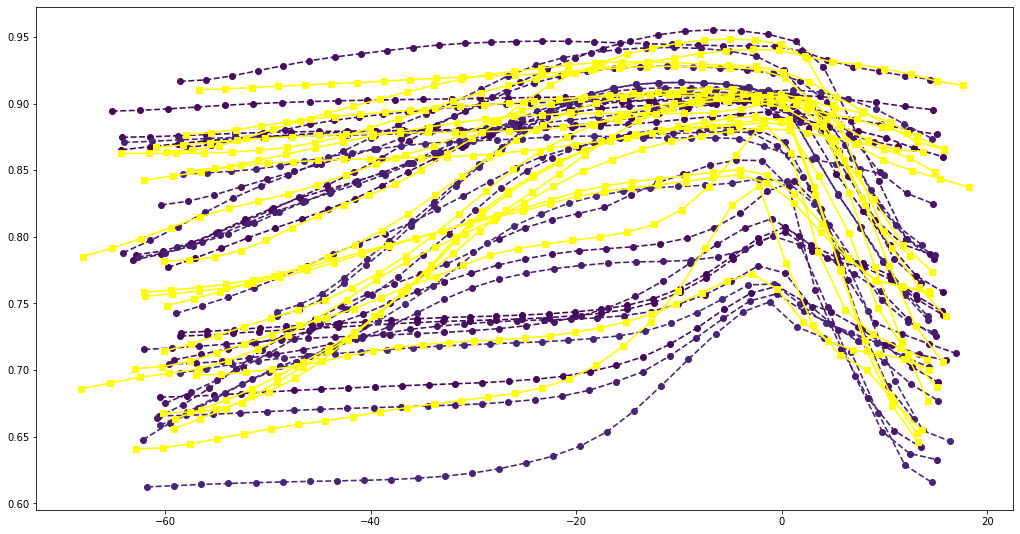

In [53]:
# PLot the R^2 of Using PI predict PI versus Ts:
from matplotlib import cm
import math

# Create a color palette
palette = plt.get_cmap('viridis')
print(palette(31))
fig1 = plt.figure(figsize = (17.5, 9.25))
ax1 = fig1.add_subplot(111)

x = np.linspace(-70., 18., 120)
y = np.linspace(0.0, 1.0, 400)

for j in range(len(deck_nas2)):
    
    if deck2[j]['cmip'] == 'cmip5':
        ax1.plot(Ts_gcm[deck_nas2[j]], R2[deck_nas2[j]], 's-', linewidth = 1.6, c = palette(, label = deck_nas2[j])
    
    if deck2[j]['cmip'] == 'cmip6':
        ax1.plot(Ts_gcm[deck_nas2[j]], R2[deck_nas2[j]], 'o--', linewidth = 1.6, c = palette(j), label = deck_nas2[j])

(31, 4)


Text(0.5, 1.0, '$R^{2}\\ versus\\ TR_{T_{s}}\\ for\\ GCMs$')

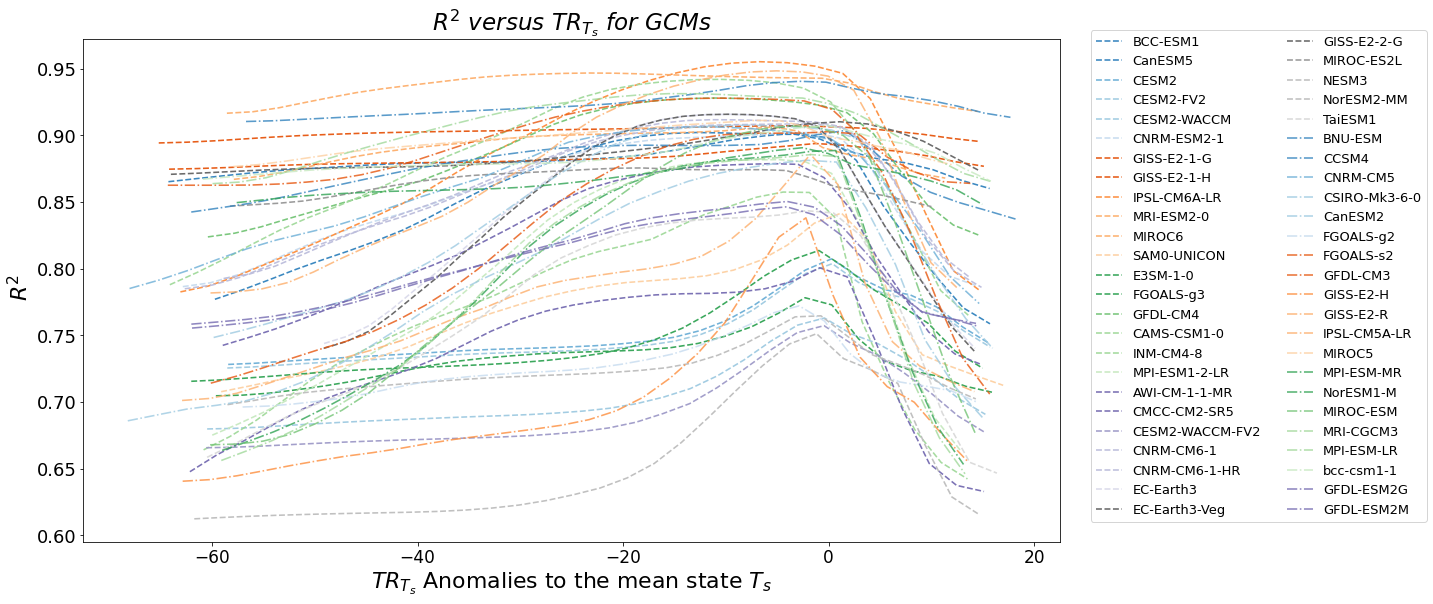

In [8]:
from matplotlib import colors as mcolor
import numpy as np
import matplotlib.pylab as plab


# plot settings:
parameters = {'axes.labelsize': 22, 'legend.fontsize': 13,
       'axes.titlesize': 23, 'xtick.labelsize': 17, 'ytick.labelsize': 18}
plt.rcParams.update(parameters)

N = 31
colors = plab.cm.tab20c(np.linspace(0., 1., N))
print(colors.shape)


fig1 = plt.figure(figsize = (17.5, 9.25))
ax1 = fig1.add_subplot(111)

x = np.linspace(-70., 18., 120)
y = np.linspace(0.0, 1.0, 400)
ki = 0
kj = 0
    
for j in range(len(deck_nas2)):
    
    if deck2[j]['cmip'] == 'cmip5':
        Line_cmip6 = ax1.plot(Ts_gcm[deck_nas2[j]], R2[deck_nas2[j]], '-.', linewidth = 1.6, c = colors[ki], alpha = 0.80, markersize = 8, label = deck2[j]['modn'], zorder = 11)
        ki += 1
    if deck2[j]['cmip'] == 'cmip6':
        Line_cmip5 = ax1.plot(Ts_gcm[deck_nas2[j]], R2[deck_nas2[j]], '--', linewidth = 1.6, c = colors[kj], alpha = 0.95, markersize =10, label = deck2[j]['modn'], zorder = 10)
        kj += 1

## plt.legend([Line_cmip6, Line_cmip5], ['cmip6', 'cmip5'])
plt.legend(bbox_to_anchor = (1.025, 0.23, 0.2, 0.8), ncol = 2)
ax1.set_xlabel(r"$TR_{T_{s}} $" + " Anomalies to the mean state "+ r"$T_{s}$")
ax1.set_ylabel(r"$\ R^{2}$")
ax1.set_title(r"$R^{2}\ versus\ TR_{T_{s}}\ for\ GCMs$")

# plt.savefig(path6+"R2_versus_TR_Ts.jpg", bbox_inches = 'tight', dpi = 325)

In [9]:
## Read two Regimes (Hot,Cold) data

output_ARRAY = {}   # storage output file
output_intermedia = {}   # storage the 'rawdata_dict'

output_dict0_PI = {}
output_dict0_abr = {}

output_GMT = {}
output_2lrm_predict = {}  # dict, store annualy, area_meaned prediction of LWP
output_2lrm_report = {}  # dict, store annually, area_meaned actual values of GCMs LWP
output_2lrm_coef_LWP = {}
output_2lrm_dict_Albedo = {}  # Coefficients of 2 regimes's albedo trained by report 'LWP' data
# output_2lrm_dict_albedo_lL = {}

# Raw data
output_2lrm_yr_bin_abr = {}
output_2lrm_yr_bin_PI = {}
output_2lrm_mon_bin_abr = {}
output_2lrm_mon_bin_PI = {}

# Metric raw data in specific units:
shape_mon_pi = {}
shape_mon_abr = {}
output_2lrm_metric_actual_PI = {}
output_2lrm_metric_actual_abr = {}

# Statistic metrics of PI:
output_Mean_training = {}
output_Stdev_training = {}

# Predict metric data in specific units:
output_2lrm_mon_bin_LWPpredi_PI = {}
output_2lrm_mon_bin_LWPpredi_abr = {}
output_2lrm_DxDtG = {}

# Index for regime(s): Only for 2lrm
output_ind_Cold_PI = {}
output_ind_Hot_PI = {}
output_ind_Cold_abr = {}
output_ind_Hot_abr = {}

Tr_sst =  0.0

for i in range(len(deck2)):
    # print("i", i)
    # folder_2lrm = glob.glob(path1+deck2[i]['modn'] + '_r2r1_hotcold(Jan)_(largestpiR2)_Sep9th_Anomalies' + '*' + '_dats.npz')
    
    folder_2lrm = glob.glob(path1+deck2[i]['modn'] + '_r2r1_hotcold(Jan)_(largestpiR2)_Sep9th_Anomalies_Rtest' + '*' + '_dats.npz')
    print(len(folder_2lrm))
    
    if len(folder_2lrm) >3:
        if (len(folder_2lrm[0]) <  len(folder_2lrm[1])) & (len(folder_2lrm[0]) <  len(folder_2lrm[2])) & (len(folder_2lrm[0]) <  len(folder_2lrm[3])):
            folder_best2lrm = folder_2lrm[0]
        elif (len(folder_2lrm[1]) <  len(folder_2lrm[0])) & (len(folder_2lrm[1]) <  len(folder_2lrm[2])) & (len(folder_2lrm[1]) <  len(folder_2lrm[3])):
            folder_best2lrm = folder_2lrm[1]
        elif (len(folder_2lrm[2]) < len(folder_2lrm[0])) & (len(folder_2lrm[2]) < len(folder_2lrm[1])) & (len(folder_2lrm[2]) < len(folder_2lrm[3])):
            folder_best2lrm = folder_2lrm[2]
        else:
            folder_best2lrm = folder_2lrm[3]
        print(folder_best2lrm)
    
    elif len(folder_2lrm) == 3:
        if (len(folder_2lrm[1]) <  len(folder_2lrm[0])) & (len(folder_2lrm[1]) <  len(folder_2lrm[2])):
            folder_best2lrm = folder_2lrm[1]
        elif (len(folder_2lrm[0]) <  len(folder_2lrm[1])) & (len(folder_2lrm[0]) <  len(folder_2lrm[2])):
            folder_best2lrm = folder_2lrm[0]
        else:
            folder_best2lrm = folder_2lrm[2]
        print(folder_best2lrm)
    
    elif len(folder_2lrm) == 2:
        if len(folder_2lrm[1]) <  len(folder_2lrm[0]):
            folder_best2lrm = folder_2lrm[1]
        else:
            folder_best2lrm = folder_2lrm[0]
        print(folder_best2lrm)
        
    else:
        output_ARRAY[deck_nas2[i]] = load(folder_2lrm[0], allow_pickle = True)  #+'_'+str(Tr_sst)
        print(folder_2lrm[0])
    output_ARRAY[deck_nas2[i]] = load(folder_best2lrm, allow_pickle=True)  #+'_'+str(Tr_sst)
    
    # output_ARRAY[deck_nas2[i]] = load(folder_2lrm[0], allow_pickle = True)  #+'_'+str(Tr_sst)
    
    output_intermedia[deck_nas2[i]] = output_ARRAY[deck_nas2[i]]['rawdata_dict']
    
    output_GMT[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['GMT']
    output_2lrm_predict[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['predicted_metrics']
    output_2lrm_report[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['report_metrics']

    output_dict0_PI[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['dict1_PI_var']
    output_dict0_abr[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['dict1_abr_var']
    
    output_2lrm_coef_LWP[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['Coef_dict']
    output_2lrm_dict_Albedo[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['coef_dict_Albedo_pi']
    
    output_2lrm_DxDtG[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['dX_dTg']
    
    # Monthly data
    output_2lrm_mon_bin_PI[deck_nas2[i]] = output_dict0_PI[deck_nas2[i]]['dict1_mon_bin_PI']
    output_2lrm_mon_bin_abr[deck_nas2[i]] = output_dict0_abr[deck_nas2[i]]['dict1_mon_bin_abr']
    # Annually data
    output_2lrm_yr_bin_PI[deck_nas2[i]] = output_dict0_PI[deck_nas2[i]]['dict1_yr_bin_PI']
    output_2lrm_yr_bin_abr[deck_nas2[i]] = output_dict0_abr[deck_nas2[i]]['dict1_yr_bin_abr']
    
    # Flattened Metric monthly mean bin data
    shape_mon_pi[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['shape_mon_PI_3']
    shape_mon_abr[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['shape_mon_abr_3']
    output_2lrm_metric_actual_PI[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['metric_training']
    output_2lrm_metric_actual_abr[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['metric_predict']
    
    # Unflattened Predicted monthly bin data
    output_2lrm_mon_bin_LWPpredi_PI[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['LWP_predi_bin_PI']
    output_2lrm_mon_bin_LWPpredi_abr[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['LWP_predi_bin_abr']
    
    # Statistic metrics of PI:
    output_Mean_training[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['Mean_training']
    output_Stdev_training[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['Stdev_training']
    
    # Indice for Regimes
    output_ind_Hot_PI[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['ind_Hot_PI']
    output_ind_Cold_PI[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['ind_Cold_PI']

    output_ind_Hot_abr[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['ind_Hot_abr']
    output_ind_Cold_abr[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['ind_Cold_abr']

print('Down read 2-LRM.')

4
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/BCC-ESM1_r2r1_hotcold(Jan)_(largestpiR2)_Sep9th_Anomalies_Rtest-3.63_dats.npz
4
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/CanESM5_r2r1_hotcold(Jan)_(largestpiR2)_Sep9th_Anomalies_Rtest-12.91_dats.npz
4
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/CESM2_r2r1_hotcold(Jan)_(largestpiR2)_Sep9th_Anomalies_Rtest0.28_dats.npz
4
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/CESM2-FV2_r2r1_hotcold(Jan)_(largestpiR2)_Sep9th_Anomalies_Rtest-0.42_dats.npz
4
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/CESM2-WACCM_r2r1_hotcold(Jan)_(largestpiR2)_Sep9th_Anomalies_Rtest0.35_dats.npz
4
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/CNRM-ESM2-1_r2r1_hotcold(Jan)_(largestpiR2)_Sep9th_Anomalies_Rtest-1.55_dats.npz
4
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/GISS-E2-1-G_r2r1_hotcold(Jan)_(largestpiR2)_Sep9th_Anomalies_Rtest-4.57_dats.npz
4
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/GISS-E2-1-H_r2r1_hotcold(Jan)_(la

In [29]:
# Calculate the mean state Ts (not differentiate the regimes):
# print(output_2lrm_metric_actual_PI[deck_nas2[0]]['LWP'])

Mean_state_Ts_GCM = {}
Mean_state_SUB_GCM = {}

for i in range(len(deck_nas2)):
    # Indice of Regimes;
    ind_Cold_PI = output_ind_Cold_PI[deck_nas2[i]].reshape(shape_mon_pi[deck_nas2[i]])
    ind_Hot_PI = output_ind_Hot_PI[deck_nas2[i]].reshape(shape_mon_pi[deck_nas2[i]])
    
    SUB_PI = deepcopy(output_2lrm_mon_bin_PI[deck_nas2[i]]['SUB_mon_bin'])
    Mean_state_SUB_GCM[deck_nas2[i]] = np.nanmean(area_mean(SUB_PI, y_range, x_range))
    
    SST_PI = deepcopy(output_2lrm_mon_bin_PI[deck_nas2[i]]['SST_mon_bin'])
    Mean_state_Ts_GCM[deck_nas2[i]] = np.nanmean(area_mean(SST_PI, y_range, x_range))
    
print(Mean_state_Ts_GCM)

{'BCCESM1': 271.6316502343597, 'CanESM5': 269.4393589012843, 'CESM2': 269.98682660222187, 'CESM2FV2': 270.95416576161364, 'CESM2WACCM': 270.01259833154427, 'CNRMESM21': 272.13408923378, 'GISSE21G': 271.15169443512093, 'GISSE21H': 271.95503084282535, 'IPSLCM6ALR': 270.39443539597886, 'MRIESM20': 270.3435020351872, 'MIROC6': 275.3463604629113, 'SAM0': 269.4119353059252, 'E3SM10': 270.82183368428423, 'FGOALSg3': 270.4802370256811, 'GFDLCM4': 269.46778215939503, 'CAMSCSM1': 273.4462900628599, 'INM_CM48': 272.0869959353597, 'MPIESM12LR': 272.3746238536935, 'AWICM11MR': 270.7788448789484, 'CMCCCM2SR5': 270.6003757677616, 'CESM2WACCMFV2': 271.1420995430643, 'CNRMCM61': 270.5998607755267, 'CNRMCM61HR': 270.74451961456043, 'ECEarth3': 274.0512594123927, 'ECEarth3Veg': 274.002800154234, 'GISSE22G': 268.951501095691, 'MIROCES2L': 276.0756691625679, 'NESM3': 272.1172520467907, 'NorESM2MM': 271.8115224404161, 'TaiESM1': 270.1618538769463, 'BNUESM': 268.08471851531493, 'CCSM4': 268.88863305124227, '

(31, 4)


Text(0.5, 1.0, '$R^{2}\\ versus\\ TR_{T_{s}}\\ for\\ 30\\ CMIP6\\ GCMs$')

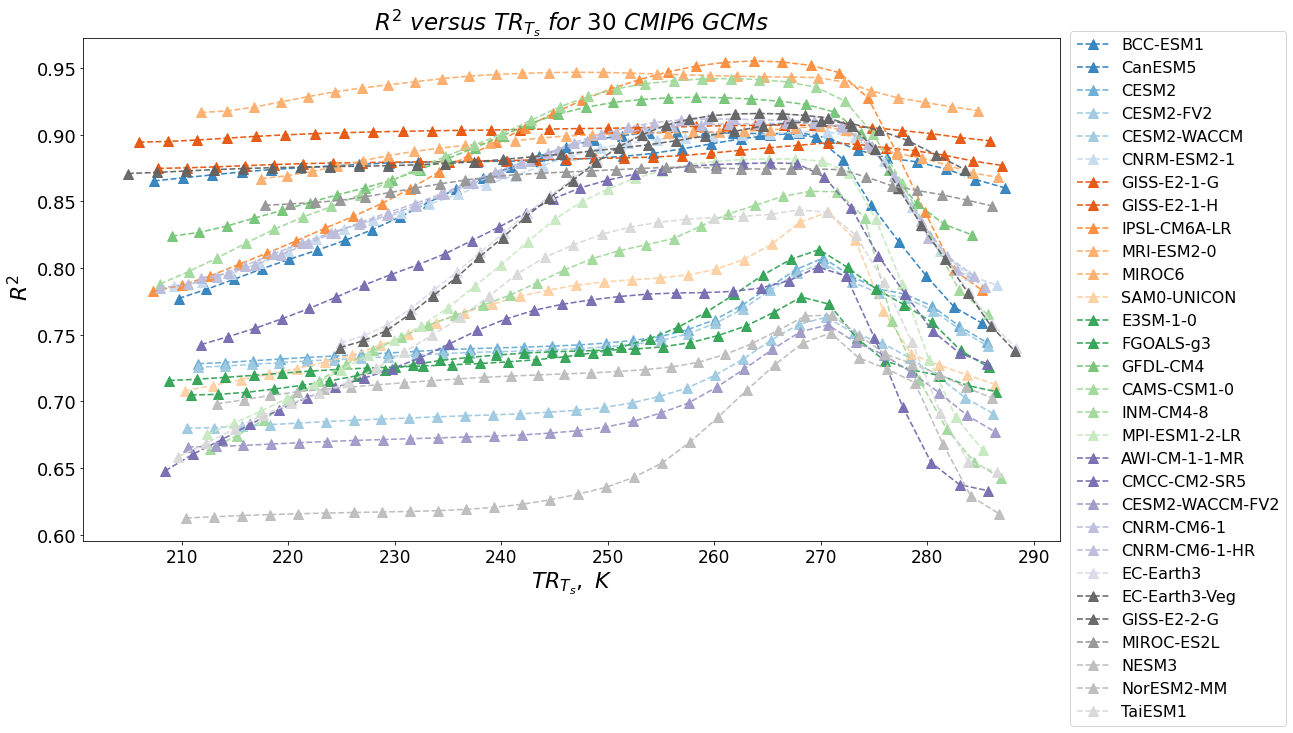

In [12]:
from matplotlib import colors as mcolor
import numpy as np
import matplotlib.pylab as plab


# plot settings:
parameters = {'axes.labelsize': 22, 'legend.fontsize': 16,
       'axes.titlesize': 23, 'xtick.labelsize': 17, 'ytick.labelsize': 18}
plt.rcParams.update(parameters)

N = 31
colors = plab.cm.tab20c(np.linspace(0., 1., N))
print(colors.shape)


fig2 = plt.figure(figsize = (17.5, 9.25))
ax2 = fig2.add_subplot(111)

x = np.linspace(-70., 18., 120)
y = np.linspace(0.0, 1.0, 400)
ki = 0
kj = 0
    
for j in range(len(deck_nas2)):
    
    # if deck2[j]['cmip'] == 'cmip5':
    #     Line_cmip6 = ax2.plot((Ts_gcm[deck_nas2[j]] + Mean_state_Ts_GCM[deck_nas2[j]]), R2[deck_nas2[j]], 's-.', linewidth = 1.6, c = colors[ki], alpha = 0.80, markersize = 8, label = deck2[j]['modn'], zorder = 11)
    #     ki += 1
    if deck2[j]['cmip'] == 'cmip6':
        Line_cmip5 = ax2.plot((Ts_gcm[deck_nas2[j]] + Mean_state_Ts_GCM[deck_nas2[j]]), R2[deck_nas2[j]], '^--', linewidth = 1.6, c = colors[kj], alpha = 0.95, markersize =10, label = deck2[j]['modn'], zorder = 10)
        kj += 1

## plt.legend([Line_cmip6, Line_cmip5], ['cmip6', 'cmip5'])
plt.legend(bbox_to_anchor = (1.040, 0.23, 0.2, 0.8))
ax2.set_xlabel(r"$TR_{T_{s}},\ K$")
ax2.set_ylabel(r"$\ R^{2}\ $")
ax2.set_xticks(ticks = np.arange(210., 292., 10.))
ax2.set_title(r"$R^{2}\ versus\ TR_{T_{s}}\ for\ 30\ CMIP6\ GCMs$")

# plt.savefig(path6+"R2_versus_TR_Ts_CMIP6_rawUnit.jpg", bbox_inches = 'tight', dpi = 325)

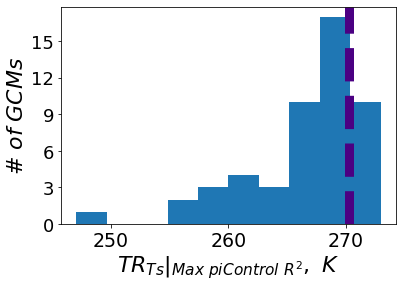

In [34]:
# Histogram of TR_Ts / TR_SUB500:
parameters = {'axes.labelsize': 22, 'xtick.labelsize': 19, 'ytick.labelsize': 18}
plt.rcParams.update(parameters)
TR_sst2_GCMs = []
TR_sub2_GCMs = []
for N_of_model in range(len(deck2)):
    
    TR_sst2_GCMs.append(TR_Ts_gcm[deck_nas2[N_of_model]] + Mean_state_Ts_GCM[deck_nas2[N_of_model]])
    TR_sub2_GCMs.append(TR_SUB500_gcm[deck_nas2[N_of_model]] +  Mean_state_SUB_GCM[deck_nas2[N_of_model]])
plt.hist(TR_sst2_GCMs)

plt.xlabel(r"$TR_{Ts}|_{Max\ piControl\ R^{2}}, \ K$")  # \omega_{500}, Pa\ s^{-1}$
plt.ylabel(r"$ \#\ of\ GCMs$")
plt.yticks(ticks = np.arange(0, 16, 3), label = np.arange(0, 16, 3))
# plt.yticks(ticks = np.arange(0, 7, 2), label = np.arange(0, 7, 2))
plt.axvline(TR_sst2_GCMs[2], linestyle = '--', linewidth = 9, color = 'indigo')
# plt.savefig(path6+'Histogram_TR_Ts_50.jpg', bbox_inches='tight', dpi = 150)

# $FR_{Hot}\ vs.\ Lat\ (GCM)\ +\ FR_{data}\ vs.\ Lat\ (OBS)$

In [100]:
print(output_2lrm_coef_LWP[deck_nas2[11]])

[[array([ 3.84176695e-04,  2.00556555e-03, -8.11140378e-05,  4.93710814e-02])
  -0.021540861620938836]
 [array([-6.84031473e-05,  5.32489551e-03,  2.96455003e-03,  1.00405881e-01])
  0.021609515772116943]]


In [101]:
# prep step1: coef_array

# calc data (monthly) standard deviation:
coef1 = []
coef2 = []
# stcoef1  = full((len(deck2), 4), 0)
# stcoef2  = full((len(deck2), 4), 0)

itcp1 = []
itcp2 = []

coef_array_50 = []

# # true LWP response to warming, this array storaged the four regimes response:
# dX_dTg_modelresponse1 = full(len(deck2), 0.000)
# dX_dTg_modelresponse2 = full(len(deck2), 0.000)
# dX_dTg_modelresponse3 = full(len(deck2), 0.000)
# dX_dTg_modelresponse4 = full(len(deck2), 0.000)

# Retrieved the 2-lrm coefficients:
for i in range(len(deck2)):
    
    a_lt = output_2lrm_coef_LWP[deck_nas2[i]][0][0].copy()
    a_le = output_2lrm_coef_LWP[deck_nas2[i]][1][0].copy()
    
    a0_lt = output_2lrm_coef_LWP[deck_nas2[i]][0][1]
    a0_le = output_2lrm_coef_LWP[deck_nas2[i]][1][1]
    
    coef_array_50.append([[a_lt, a0_lt], [a_le, a0_le]])
    # print(coef_array_50)
    
    # print(m, t, e, f)
    coef1.append(a_lt)
    coef2.append(a_le)
    
    itcp1.append(array(a0_lt))
    itcp2.append(array(a0_le))

coef_array_50 = np.asarray(coef_array_50)
print(coef_array_50[:,0, 0])
# print(np.asarray(coef2))
# print(itcp2)

[array([ 0.00176186,  0.06535026, -0.00017198, -0.0827015 ])
 array([ 0.00040799,  0.02928086,  0.00026927, -0.09198488])
 array([ 0.00186069,  0.01620253, -0.00050757,  0.06488364])
 array([ 0.00179792,  0.00592406, -0.00026394,  0.09741796])
 array([ 0.00187764,  0.0155213 , -0.00049967,  0.06054689])
 array([ 4.95567839e-04,  1.66786013e-02,  9.83954448e-05, -4.16170749e-02])
 array([ 0.00163351,  0.06153913,  0.00033854, -0.11878166])
 array([ 0.0019948 ,  0.06404127,  0.00017798, -0.14596992])
 array([ 0.00034209,  0.01575314, -0.00010438, -0.03140381])
 array([0.00042569, 0.03345543, 0.0001887 , 0.01788949])
 array([0.00162827, 0.05463641, 0.00013428, 0.09130694])
 array([ 3.84176695e-04,  2.00556555e-03, -8.11140378e-05,  4.93710814e-02])
 array([ 1.25217132e-03,  1.77978230e-02, -2.34164371e-05,  2.01681804e-02])
 array([ 1.23696571e-03,  1.08321864e-02, -3.99372371e-05,  1.68610796e-03])
 array([ 0.00048299,  0.03937724,  0.00015857, -0.00174648])
 array([3.21201506e-04, 9.467

In [102]:
# prep step 2: X_dict

X_dict_50_PI  = {}
X_dict_50_abr = {}

for i in arange(len(deck_nas2)):
    
    X_dict_PI = {}
    X_dict_PI['SST'] = output_2lrm_metric_actual_PI[deck_nas2[i]]['SST'].reshape(shape_mon_pi[deck_nas2[i]])
    X_dict_PI['p_e'] = output_2lrm_metric_actual_PI[deck_nas2[i]]['p_e'].reshape(shape_mon_pi[deck_nas2[i]])
    X_dict_PI['LTS'] = output_2lrm_metric_actual_PI[deck_nas2[i]]['LTS'].reshape(shape_mon_pi[deck_nas2[i]])
    X_dict_PI['SUB'] = output_2lrm_metric_actual_PI[deck_nas2[i]]['SUB'].reshape(shape_mon_pi[deck_nas2[i]])
    
    X_dict_abr = {}
    X_dict_abr['SST'] = output_2lrm_metric_actual_abr[deck_nas2[i]]['SST'].reshape(shape_mon_abr[deck_nas2[i]])
    X_dict_abr['p_e'] = output_2lrm_metric_actual_abr[deck_nas2[i]]['p_e'].reshape(shape_mon_abr[deck_nas2[i]])
    X_dict_abr['LTS'] = output_2lrm_metric_actual_abr[deck_nas2[i]]['LTS'].reshape(shape_mon_abr[deck_nas2[i]])
    X_dict_abr['SUB'] = output_2lrm_metric_actual_abr[deck_nas2[i]]['SUB'].reshape(shape_mon_abr[deck_nas2[i]])
    
    
    X_dict_50_PI[deck_nas2[i]] = X_dict_PI
    X_dict_50_abr[deck_nas2[i]] = X_dict_abr

In [103]:
# Building functions:

import numpy as np

def rdlrm_2_predict_modify(X_dict, coef_array, cut_off1, predictant = 'LWP', predictor = ['SST', 'p_e', 'LTS', 'SUB'], r = 2):
    # 'predict_dict' is a dictionary to store the 'predict_label_LWP' and 'predict_value_LWP' (for CCF1, 2, 3, 4,.. and the intercept);
    predict_dict = {}

    # 'predict_label_LWP' is an array to store the regimes_lebel of each grid points in 3-D structure of data array
    predict_label_LWP = np.zeros((X_dict['p_e'].shape[0], X_dict['p_e'].shape[1], X_dict['p_e'].shape[2]))

    # 'predict_value_LWP' is an array to store the predicted LWP
    predict_value_LWP = [X_dict['SST'] *1., X_dict['p_e'] *1., X_dict['LTS'] *1., X_dict['SUB'] *1.,
                         np.ones((X_dict['SST'].shape[0], X_dict['SST'].shape[1], X_dict['SST'].shape[2]))]
    print(np.asarray(predict_value_LWP).shape)

    
    # LOOP THROUGH REGIMES ('2'):
    # split data with skin Temperature (SST) Larger\Equal and Less than Cut_off1
    
    ind_hot = X_dict['SST'] >= cut_off1
    ind_cold = X_dict['SST'] < cut_off1 
    # 
    # ind_up   = X_dict['SUB'] <= cut_off2
    # ind_down = X_dict['SUB'] > cut_off2
    ind6 = ind_hot
    ind7 = ind_cold

    Regimes = [ind7, ind6]
    print(' Total # of regime', len(Regimes))
    
    for i in range(len(Regimes)):
        print('current # of regimes', i)
        ind = Regimes[i]
        
        predict_label_LWP[ind] = i + 1
        
        # LOOP THROUGH Cloud Controlling Factors ('4') and intercepts ('+1'):
        
        for j in range(len(predict_value_LWP)):
            print('current # of ccfs', j)
            if j < 4: 
                predict_value_LWP[j][ind] = 1000. * (coef_array[i,0][j] * predict_value_LWP[j][ind])
            elif j == (len(predict_value_LWP)  - 1): 
                predict_value_LWP[j][ind] = 1000. * (coef_array[i,1] * predict_value_LWP[j][ind])
    
    # Detecting nan values in the CCFs metrics
    Z = X_dict['LTS'] * 1. 

    for k in range(len(predict_value_LWP)):
        Z = Z * predict_value_LWP[k]
    ind_false = np.isnan(Z)
    
    ind_true = np.logical_not(ind_false)
    print('ratio of non-nan: ', np.asarray(np.nonzero(ind_true==True)).shape[1] / len(X_dict['LTS'].flatten()))  #.. ratio of 'non-nan'.
    
    # match all the points with the same 'NaN' POSITIONS:
    predict_label_LWP[ind_false] = 0
    for l in range(len(predict_value_LWP)): 

        predict_value_LWP[l][ind_false] = np.nan
    
    
    # print("predict_value_LWP ", predict_value_LWP)
    # print("label", predict_label_LWP)  # '1' for 'Cold' regime, '2' for 'Hot' regime
    
    predict_dict['label'] = predict_label_LWP
    predict_dict['value'] = np.asarray(predict_value_LWP)

    return predict_dict

In [1]:
# Calc the Warm Regime bin points ratio versus Latitude:

Warm_Fr_GCM = {}
Cold_Fr_GCM = {}
WD = '/glade/scratch/chuyan/CMIP_output/'


# find the model wanted:
for N_of_model in range(len(deck2)):
    # N_of_model = 11

    folder = glob.glob(WD+ deck_nas2[N_of_model]+'__'+ 'STAT_pi+abr_'+'22x_31y_Sep9th_anomalies'+ '.npz')

    output_ARRAY = np.load(folder[0], allow_pickle=True)  # str(TR_sst)
    TR_sst1 = output_ARRAY['TR_minabias_SST']
    TR_sub1 = output_ARRAY['TR_minabias_SUB']
    TR_sst2 = output_ARRAY['TR_maxR2_SST']
    TR_sub2 = output_ARRAY['TR_maxR2_SUB']
    print("GCM: No.", str(N_of_model+1), " :", deck2[N_of_model]['modn'])
    # print("TR_min_abs(bias): " , TR_sst1, ' K ', TR_sub1 , ' Pa/s ')
    print("TR_large_pi_R_2: ", TR_sst2, ' K ', TR_sub2 , ' Pa/s ')

    predict_dict1 = rdlrm_2_predict_modify(X_dict_50_abr[deck_nas2[N_of_model]], coef_array_50[N_of_model,:,:], cut_off1 = TR_sst2, predictant = 'LWP', predictor = ['SST', 'p_e', 'LTS', 'SUB'], r = 2)
    predict_dict2 = rdlrm_2_predict_modify(X_dict_50_PI[deck_nas2[N_of_model]], coef_array_50[N_of_model,:,:], cut_off1 = TR_sst2, predictant = 'LWP', predictor = ['SST', 'p_e', 'LTS', 'SUB'], r = 2)


    Regimes = 2
    CCFs = 4

    # individual components:
    predict_label_LWP1 = predict_dict1['label'] *1
    predict_value_LWP1 = deepcopy(predict_dict1['value'] )  # abrupt-4xCO2

    predict_label_LWP2 = predict_dict2['label'] *1
    predict_value_LWP2 = deepcopy(predict_dict2['value'])  # picontrol
    # print(predict_dict2['value'])

    # total LWP changes:
    total_report_LWP1 = output_2lrm_mon_bin_abr[deck_nas2[N_of_model]]['LWP_mon_bin'] * 1    #abr4x

    total_report_LWP2 = output_2lrm_mon_bin_PI[deck_nas2[N_of_model]]['LWP_mon_bin'] * 1   #PI

    # define array to store the total and individual components of 4 lrm:

    fraction_of_occurrence = np.full((Regimes, total_report_LWP2.shape[1], total_report_LWP2.shape[2]), 0.00)  # 2 * N_Lat, N_Lon
    # #.. test code.
    # ind_Regime1_10 = predict_label_LWP2[:, 1, 0] == 0+1
    # print(ind_Regime1_10)
    # print(np.asarray(np.nonzero(ind_Regime1_10==True)).shape[1]/ (total_report_LWP2.shape[0]))

    for R in arange(0, Regimes, 1):
        for i in range(total_report_LWP2.shape[1]):
            for j in range(total_report_LWP2.shape[2]):

                ind_true_grids = predict_label_LWP2[:,i,j] == (R+1)
                fraction_of_occurrence[R, i, j] = np.asarray(np.nonzero(ind_true_grids==True)).shape[1] / (total_report_LWP2.shape[0])

    Warm_Fr = np.nanmean(fraction_of_occurrence[1, :, :], axis = 1)
    Cold_Fr = np.nanmean(fraction_of_occurrence[0, :, :], axis = 1)
    # print(Warm_Fr)

    Warm_Fr_GCM[deck_nas2[N_of_model]] = Warm_Fr


NameError: name 'deck2' is not defined

In [105]:
print(Warm_Fr_GCM)

{'BCCESM1': array([0.        , 0.01802402, 0.13366741, 0.4012125 , 0.79715681,
       0.98771143, 1.        , 1.        , 1.        ]), 'CanESM5': array([0.06622045, 0.11108775, 0.22122932, 0.57611438, 0.86460378,
       0.99049154, 1.        , 1.        , 1.        ]), 'CESM2': array([0.        , 0.00399832, 0.03511972, 0.1600145 , 0.58712121,
       0.92872007, 1.        , 0.99978956, 1.        ]), 'CESM2FV2': array([0.        , 0.00645968, 0.05017054, 0.1921199 , 0.62753481,
       0.9462083 , 1.        , 0.99988319, 1.        ]), 'CESM2WACCM': array([2.33819678e-05, 3.05134680e-03, 3.16708754e-02, 1.54040404e-01,
       5.81556304e-01, 9.26861205e-01, 9.99976618e-01, 9.99859708e-01,
       1.00000000e+00]), 'CNRMESM21': array([0.00641835, 0.0274855 , 0.13366302, 0.35221427, 0.74417789,
       0.92561027, 0.99804761, 0.99787224, 1.        ]), 'GISSE21G': array([9.34492104e-04, 2.48691711e-02, 1.46294739e-01, 3.91809177e-01,
       7.87134380e-01, 9.97757219e-01, 1.00000000e+00, 9.99

In [106]:
# Calc the Non-nan point ratios in OBS:

# get the variables for training:
inputVar_obs = get_OBSLRM(valid_range1=valid_range1, valid_range2=valid_range2)
# ------------------------
# radiation code

# ------------------------

# Data processing
# --Liquid water path, Unit in kg m^-2
LWP = inputVar_obs['lwp'] / 1000.
# 1-Sigma Liquid water path statistic error, Unit in kg m^-2
LWP_error = inputVar_obs['lwp_error'] / 1000.
# the MaskedArray of 'MAC-LWP' dataset
Maskarray_mac = inputVar_obs['maskarray_mac']
# ---

# GMT: Global mean surface air Temperature (2-meter), Unit in K
gmt = inputVar_obs['tas'] * 1.
# SST: Sea Surface Temperature or skin- Temperature, Unit in K
SST = inputVar_obs['sfc_T'] * 1.
# Precip: Precipitation, Unit in mm day^-1 (convert from kg m^-2 s^-1)
Precip = inputVar_obs['P'] * (24. * 60 * 60)
# Eva: Evaporation, Unit in mm day^-1 (here use the latent heat flux from the sfc, unit convert from W m^-2 --> kg m^-2 s^-1 --> mm day^-1)
lh_vaporization = (2.501 - (2.361 * 10**-3) * (SST - 273.15)) * 1e6  # the latent heat of vaporization at the surface Temperature
Eva = inputVar_obs['E'] / lh_vaporization *(24. * 60 * 60)

# MC: Moisture Convergence, represent the water vapor abundance, Unit in mm day^-1
MC = Precip - Eva
# print(MC)

# LTS: Lower Tropospheric Stability, Unit in K (the same as Potential Temperature):
k = 0.286

theta_700 = inputVar_obs['T_700'] * (100000. / 70000.)**k
theta_skin = inputVar_obs['sfc_T'] * (100000. / inputVar_obs['sfc_P'])**k
LTS_m = theta_700 - theta_skin  # LTS with np.nan

#.. mask the place with np.nan value
LTS_e = np.ma.masked_where(theta_700==np.nan, LTS_m)
# print(LTS_e)

Subsidence = inputVar_obs['sub']

# SW radiative flux:
Rsdt = inputVar_obs['rsdt']
Rsut = inputVar_obs['rsut']
Rsutcs = inputVar_obs['rsutcs']

albedo = Rsut / Rsdt
albedo_cs = Rsutcs / Rsdt
Alpha_cre = albedo - albedo_cs
# abnormal values:
albedo_cs[(albedo_cs <= 0.08) & (albedo_cs >= 1.00)] == np.nan
Alpha_cre[(albedo_cs <= 0.08) & (albedo_cs >= 1.00)] == np.nan

# define Dictionary to store: CCFs(4), gmt, other variables :
dict0_var = {'gmt': gmt, 'SST': SST, 'p_e': MC, 'LTS': LTS_m, 'SUB': Subsidence, 'LWP': LWP, 'rsdt': Rsdt, 'rsut': Rsut, 'rsutcs': Rsutcs, 'albedo' : albedo, 'albedo_cs': albedo_cs, 'alpha_cre': Alpha_cre, 'LWP_statistic_error': LWP_error, 'Maskarray_mac': Maskarray_mac}

# Crop the regions
# crop the variables to the Southern Ocean latitude range: (40 ~ 85^o S)

dict1_SO, lat_merra2_so, lon_merra2_so = region_cropping(dict0_var, ['SST', 'p_e', 'LTS', 'SUB'], inputVar_obs['lat_merra2'], inputVar_obs['lon_merra2'], lat_range = [-85., -40.], lon_range = [-180., 180.])

dict1_SO, lat_mac_so, lon_mac_so = region_cropping(dict1_SO, ['LWP', 'LWP_statistic_error', 'Maskarray_mac'], inputVar_obs['lat_mac'], inputVar_obs['lon_mac'], lat_range =[-85., -40.], lon_range = [-180., 180.])

# Time-scale average
# monthly mean (not changed)
dict2_SO_mon = deepcopy(dict1_SO)

# annually mean variable
dict2_SO_yr = get_annually_dict(dict1_SO, ['gmt', 'SST', 'p_e', 'LTS', 'SUB', 'LWP', 'LWP_statistic_error', 'rsdt', 'rsut', 'rsutcs', 'albedo', 'albedo_cs', 'alpha_cre'], inputVar_obs['times_merra2'], label = 'mon')


# Propagate the np.nan values in 3 different datasets
# monthly data
test_array_mon = np.ones((dict2_SO_mon['LWP'].shape))
for i in ['SST', 'p_e', 'LTS', 'SUB', 'LWP', 'LWP_statistic_error', 'rsdt', 'rsut', 'rsutcs', 'albedo', 'albedo_cs', 'alpha_cre']:
    if dict2_SO_mon[i].shape == dict2_SO_mon['LWP'].shape:
        test_array_mon = test_array_mon * (1. * dict2_SO_mon[i])

shape_ratio_mon = np.asarray(np.nonzero(np.isnan(test_array_mon) == True)).shape[1] / len(test_array_mon.flatten())

Maskarray_all_mon = np.isnan(test_array_mon)  # store the mask positions for monthly MERRA-2, MAC-LWP, CERES data in the SO;

x_array_mon = np.zeros((dict2_SO_mon['SST'].shape))  # used for count the missing points in monthly binned boxes
x_array_mon[np.isnan(test_array_mon)] = 1.0
# print(shape_ratio_mon, x_array_mon)

# Propagating the .nan into monthly mean data:
for j in ['SST', 'p_e', 'LTS', 'SUB', 'LWP', 'LWP_statistic_error', 'rsdt', 'rsut', 'rsutcs', 'albedo', 'albedo_cs', 'alpha_cre']:
    if dict2_SO_mon[j].shape == dict2_SO_mon['LWP'].shape:
        dict2_SO_mon[j][Maskarray_all_mon] = np.nan

# annually data
test_array_yr = np.ones((dict2_SO_yr['LWP'].shape))
for i in ['SST', 'p_e', 'LTS', 'SUB', 'LWP', 'LWP_statistic_error', 'rsdt', 'rsut', 'rsutcs', 'albedo', 'albedo_cs', 'alpha_cre']:
        if dict2_SO_yr[i].shape == dict2_SO_yr['LWP'].shape:
            test_array_yr = test_array_yr * (1. * dict2_SO_yr[i])

shape_ratio_yr = np.asarray(np.nonzero(np.isnan(test_array_yr) == True)).shape[1] / len(test_array_yr.flatten())
# print(shape_ratio_yr)
Maskarray_all_yr = np.isnan(test_array_yr)  # store the mask positions for annually mean MERRA-2, MAC-LWP, CERES data in the SO;

x_array_yr = np.zeros((dict2_SO_yr['SST'].shape))  # used for count the missing points in annually mean binned boxes
x_array_yr[np.isnan(test_array_yr)] = 1.0

# Propagating the .nan into annually mean data:
for j in ['SST', 'p_e', 'LTS', 'SUB', 'LWP', 'LWP_statistic_error', 'rsdt', 'rsut', 'rsutcs', 'albedo', 'albedo_cs', 'alpha_cre']:
    if dict2_SO_yr[j].shape == dict2_SO_yr['LWP'].shape:
        dict2_SO_yr[j][Maskarray_all_yr] = np.nan

# binned (spatial) avergae.
# Southern Ocean 5 * 5 degree bin box

#..set are-mean range and define function
s_range = arange(-90., 90., 5.) + 2.5  #..global-region latitude edge: (36)
x_range = arange(-180., 180.5, 5.)  #..logitude sequences edge: number: 72
y_range = arange(-85, -40., 5.) + 2.5  #..southern-ocaen latitude edge: 9


# binned Monthly variables:
dict3_SO_mon_bin = {}

for e in ['SST', 'p_e', 'LTS', 'SUB', 'LWP', 'LWP_statistic_error', 'rsdt', 'rsut', 'rsutcs', 'albedo', 'albedo_cs', 'alpha_cre']:

    dict3_SO_mon_bin[e] = binned_cySouthOcean5(dict2_SO_mon[e], inputVar_obs['lat_ceres'], inputVar_obs['lon_ceres'])
    # since the latitide/ longitude grid for MERRA-2 (data_type = '2') and MAC-LWP/ CERES-EBAF-TOA_Ed4.1 are the same, it does not matter for the choice of lat/lon.

dict3_SO_mon_bin['gmt'] = binned_cyGlobal5(dict2_SO_mon['gmt'], inputVar_obs['lat_merra2'], inputVar_obs['lon_merra2'])
print("End monthly data binned.")

# binned Annually data (it's different than do the binned operation on the 'dict2_SO_yr'):
dict3_SO_yr_bin = get_annually_dict(dict3_SO_mon_bin, ['gmt', 'SST', 'p_e', 'LTS', 'SUB', 'LWP', 'LWP_statistic_error', 'rsdt', 'rsut', 'rsutcs', 'albedo', 'albedo_cs', 'alpha_cre'], inputVar_obs['times_merra2'])

print("End annually data binned.")

# count the ratio of values that are missing in each bin boxes:
ratio_array = binned_cySO_availabledata(x_array_mon, inputVar_obs['lat_ceres'], inputVar_obs['lon_ceres'])

ind_binned_omit = np.where(ratio_array>0.499, True, False)  # ignoring bin boxes which has the ratio of np.nan points over 0.5.

shape_ratio_bin = np.asarray(np.nonzero(ind_binned_omit == True)).shape[1] / len(ind_binned_omit.flatten())
# print(shape_ratio_bin)   # ratio of bin boxes that should be omited

for k in ['SST', 'p_e', 'LTS', 'SUB', 'LWP', 'LWP_statistic_error', 'rsdt', 'rsut', 'rsutcs', 'albedo', 'albedo_cs', 'alpha_cre']:
    if dict3_SO_mon_bin[k].shape == dict3_SO_mon_bin['LWP'].shape:
        dict3_SO_mon_bin[k][ind_binned_omit] = np.nan


(42,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
[2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016]
Fill Value:  -999.0
(168, 45, 360)
Fill Value:  -999.0
(168, 45, 360)
Fill Value:  -999.0
(168, 45, 360)


/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in less_equal
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in less_equal
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in greater_equal


 ended cropping 
 ended cropping 
End monthly data binned.
End annually data binned.


In [91]:
# ratio 1: the raw resolution MAC-LWP data non-nan ratio:

print(dict1_SO['Maskarray_mac'].shape)
fraction_of_nonnan1 = np.full((dict1_SO['LWP'].shape[1]), 0.00)  # N_Lat (45) 
mask_int = np.zeros((dict1_SO['LWP'].shape))
print(mask_int.shape)

mask_int[dict1_SO['Maskarray_mac'] == False] = 1.

for i in range(mask_int.shape[1]):
    ind_true_grids_obs = mask_int[:,i,:] == 1.
    fraction_of_nonnan1[i] = np.asarray(np.nonzero(ind_true_grids_obs==True)).shape[1] / (mask_int.shape[0]*mask_int.shape[2])

# print(fraction_of_nonnan1)
fraction_of_nonnan1_bin, binned_edges, binnumber = binned_statistic(lat_mac_so, values = fraction_of_nonnan1, statistic = 'mean', bins = arange(-85, -35., 5.))
print(fraction_of_nonnan1_bin)

# ratio 2: the raw resolution ALL-data ratio:

print(x_array_mon.shape)
fraction_of_nonnan2 = np.full((dict2_SO_mon['LWP'].shape[1]), 0.00)   # N_Lat (45)

for i in range(mask_int.shape[1]):
    ind_true_grids_obs = x_array_mon[:,i,:] == 0.   # noticed that the meaning of '1. / 0.' of marker array:'x_array_mon' is different than the above and below
    fraction_of_nonnan2[i] = np.asarray(np.nonzero(ind_true_grids_obs==True)).shape[1] / (dict2_SO_mon['LWP'].shape[0]*dict2_SO_mon['LWP'].shape[2])

# print(fraction_of_nonnan2)
fraction_of_nonnan2_bin, binned_edges2, binnumber2 = binned_statistic(lat_mac_so, values = fraction_of_nonnan2, statistic = 'mean', bins = arange(-85, -35., 5.))
print(fraction_of_nonnan2_bin)

# ratio 3: the 5 X 5 degrees bin, ALL-data non-nan ratio:

# x_array_mon_bin = np.zeros((dict3_SO_mon_bin['LWP'].shape))
# x_array_mon_bin[np.logical_not(np.isnan(dict3_SO_mon_bin['LWP']))] = 1.

# fraction_of_nonnan3 = np.full((dict3_SO_mon_bin['LWP'].shape[1]), 0.0)   # N_Lat (9)

# for i in range(dict3_SO_mon_bin['LWP'].shape[1]):
#     ind_true_grids_obs = x_array_mon_bin[:,i,:] == 1.
#     fraction_of_nonnan3[i] = np.asarray(np.nonzero(ind_true_grids_obs==True)).shape[1] / (dict3_SO_mon_bin['LWP'].shape[0]*dict3_SO_mon_bin['LWP'].shape[2])

print(fraction_of_nonnan3)


# ratio 4: the ratio of 5 X 5 degrees bin box, with non-nan All-dataraw resolution points insides>= 0.501 versus Latitude:

x_array_mon_bin2 = np.zeros((dict3_SO_mon_bin['LWP'].shape))
x_array_mon_bin2[np.logical_not(np.isnan(dict3_SO_mon_bin['LWP']))] = 1.

fraction_of_nonnan4 = np.full((dict3_SO_mon_bin['LWP'].shape[1]), 0.0)   # N_Lat (9)

for i in range(dict3_SO_mon_bin['LWP'].shape[1]):
    ind_true_grids_obs = x_array_mon_bin2[:,i,:] == 1.
    fraction_of_nonnan4[i] = np.asarray(np.nonzero(ind_true_grids_obs==True)).shape[1] / (dict3_SO_mon_bin['LWP'].shape[0]*dict3_SO_mon_bin['LWP'].shape[2])

print(fraction_of_nonnan4)

(168, 45, 360)
(168, 45, 360)
[0.         0.00693122 0.01694444 0.18902447 0.61830026 0.92568452
 0.97625992 0.96764881 0.95230489]
(168, 45, 360)
[0.         0.00693122 0.01694444 0.18886574 0.61830026 0.92568452
 0.97625992 0.96764881 0.95175265]
[0.21883267 0.52992725 0.81952712 0.96883267 0.99834656 0.99156746
 0.98611111 0.98611111 0.98611111]
[0.         0.00314153 0.01066468 0.17584325 0.63673942 0.93055556
 0.98404431 0.97222222 0.9537037 ]


(31, 4)


Text(0.5, 1.0, '$FR_{Warm}\\ vs.\\ Lat\\ (GCM)\\ +\\ FR_{data}\\ vs.\\ Lat\\ (OBS)$')

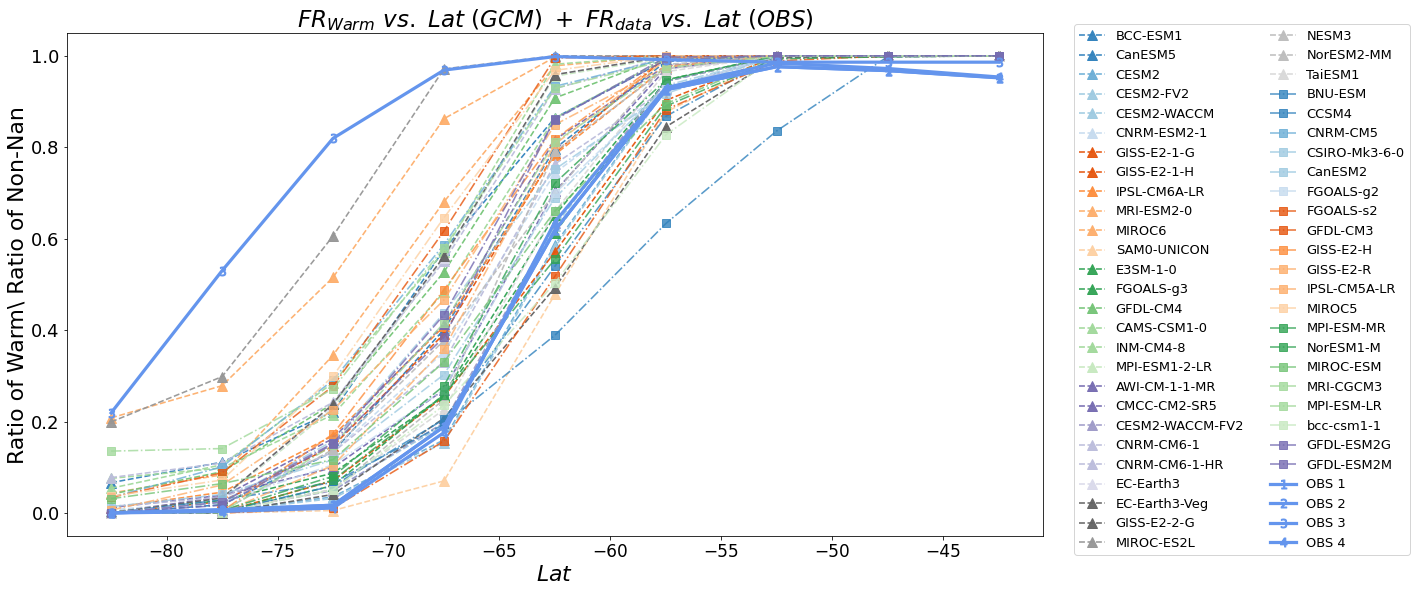

In [119]:
# PLotting Ratio of Warm regime to ALL regime Vs. Lattude
# + Ratio of non-nan points to the total number of points VS. Latitude 

from matplotlib import colors as mcolor
import numpy as np
import matplotlib.pylab as plab


# plot settings:
parameters = {'axes.labelsize': 22, 'legend.fontsize': 13,
       'axes.titlesize': 23, 'xtick.labelsize': 17, 'ytick.labelsize': 18}
plt.rcParams.update(parameters)

N = 31
colors = plab.cm.tab20c(np.linspace(0., 1., N))
print(colors.shape)

fig2 = plt.figure(figsize = (17.5, 9.25))
ax2 = fig2.add_subplot(111)

x = y_range
y = np.linspace(0.0, 1.0, 36)
ki = 0
kj = 0
    
for j in range(len(deck_nas2)):
    
    if deck2[j]['cmip'] == 'cmip5':
        Line2_cmip6 = ax2.plot(y_range, Warm_Fr_GCM[deck_nas2[j]], 's-.', linewidth = 1.6, c = colors[ki], alpha = 0.80, markersize = 8, label = deck2[j]['modn'], zorder = 11)
        ki += 1
    
    if deck2[j]['cmip'] == 'cmip6':
        Line2_cmip5 = ax2.plot(y_range, Warm_Fr_GCM[deck_nas2[j]], '^--', linewidth = 1.6, c = colors[kj], alpha = 0.95, markersize = 10, label = deck2[j]['modn'], zorder = 10)
        kj += 1

ax2.plot(y_range, fraction_of_nonnan1_bin, linestyle = '-', marker = '$1$', linewidth = 3.2, c = 'cornflowerblue', markersize = 9, alpha = 1, label = 'OBS 1', zorder = 12)
ax2.plot(y_range, fraction_of_nonnan2_bin, linestyle = '-', marker = '$2$', linewidth = 3.2, c = 'cornflowerblue', markersize = 9, alpha = 1, label = 'OBS 2', zorder = 13)
ax2.plot(y_range, fraction_of_nonnan3, linestyle = '-', marker = '$3$', linewidth = 3.2, c = 'cornflowerblue', markersize = 9, alpha = 1, label = 'OBS 3', zorder = 14)
ax2.plot(y_range, fraction_of_nonnan4, linestyle = '-', marker = '$4$', linewidth = 3.2, c = 'cornflowerblue', markersize = 9, alpha = 1, label = 'OBS 4', zorder = 15)

## plt.legend([Line_cmip6, Line_cmip5], ['cmip6', 'cmip5'])
plt.legend(bbox_to_anchor = (1.025, 0.23, 0.2, 0.8), ncol = 2)

ax2.set_xlabel(r"$ Lat $")
ax2.set_ylabel("Ratio of Warm\ Ratio of Non-Nan")
ax2.set_title(r"$FR_{Warm}\ vs.\ Lat\ (GCM)\ +\ FR_{data}\ vs.\ Lat\ (OBS)$")

# plt.savefig(path6+"FR_Warm_GCM_&_FR_Non-nan_OBS.jpg", bbox_inches = 'tight', dpi = 345)# 